In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

import joblib


In [2]:
# Chargement des données RH
data = pd.read_csv("../WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Aperçu du dataset
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})


In [ ]:
features = [
    'Age',
    'DailyRate',
    'DistanceFromHome',
    'EnvironmentSatisfaction',
    'JobSatisfaction',
    'OverTime',
    'Department',
    'JobRole'
]

X = data[features]
y = data['Attrition']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
numeric_features = [
    'Age',
    'DailyRate',
    'DistanceFromHome',
    'EnvironmentSatisfaction',
    'JobSatisfaction'
]

categorical_features = [
    'OverTime',
    'Department',
    'JobRole'
]


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",True
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [ ]:
numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(
    drop='first',
    handle_unknown='ignore'
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [ ]:
svm_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', SVC(
        kernel='rbf',
        C=1,
        gamma='scale',
        probability=True,
        random_state=42
    ))
])


Accuracy : 0.8401360544217688

Rapport de classification :

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

ROC-AUC : 0.5074511155138255


C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

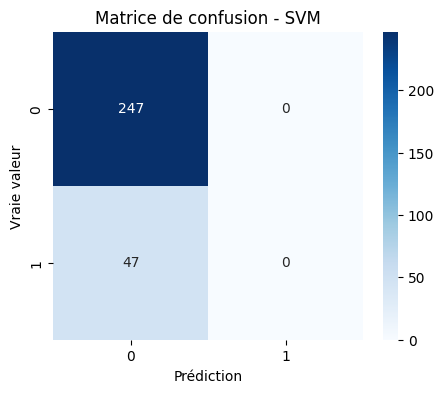

In [ ]:
svm_pipeline.fit(X_train, y_train)


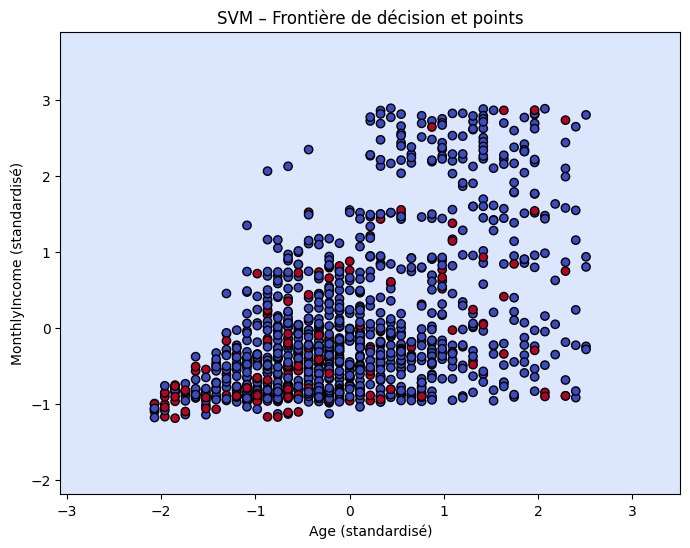

In [ ]:
y_pred = svm_pipeline.predict(X_test)
y_proba = svm_pipeline.predict_proba(X_test)[:, 1]


In [ ]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nRapport de classification :\n")
print(classification_report(y_test, y_pred))
print("ROC-AUC :", roc_auc_score(y_test, y_proba))


Attrition prédite : No
Probabilité d'attrition : 15.35 %


C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - SVM")
plt.xlabel("Prédiction")
plt.ylabel("Vraie valeur")
plt.show()


In [ ]:
profil_employe = {
    'Age': 29,
    'DailyRate': 400,
    'DistanceFromHome': 25,
    'EnvironmentSatisfaction': 1,
    'JobSatisfaction': 1,
    'OverTime': 'Yes',
    'Department': 'Sales',
    'JobRole': 'Sales Executive'
}

profil_df = pd.DataFrame([profil_employe])


In [ ]:
prediction = svm_pipeline.predict(profil_df)
proba = svm_pipeline.predict_proba(profil_df)

print("Attrition prédite :", "Yes" if prediction[0] == 1 else "No")
print("Probabilité d'attrition :", round(proba[0][1]*100, 2), "%")


In [ ]:
from sklearn.decomposition import PCA

# Projection en 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(
    svm_pipeline.named_steps['preprocessing'].transform(X)
)

# Entraînement SVM sur données PCA
svm_pca = SVC(kernel='rbf', C=1, gamma='scale')
svm_pca.fit(X_pca, y)


In [ ]:
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9,6))

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=y,
    cmap='coolwarm',
    edgecolors='k'
)

plt.scatter(
    svm_pca.support_vectors_[:, 0],
    svm_pca.support_vectors_[:, 1],
    s=120,
    facecolors='none',
    edgecolors='black',
    label='Support Vectors'
)

plt.title("SVM multi-features – Visualisation via PCA")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend()
plt.show()


In [ ]:
from sklearn.manifold import TSNE

X_tsne = TSNE(
    n_components=2,
    perplexity=30,
    random_state=42
).fit_transform(
    svm_pipeline.named_steps['preprocessing'].transform(X)
)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='coolwarm')
plt.title("Visualisation SVM multi-features – t-SNE")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()


In [ ]:
svm_linear = svm_pipeline.named_steps['model']

importance = np.abs(svm_linear.coef_[0])
features_names = svm_pipeline.named_steps['preprocessing'].get_feature_names_out()

imp_df = pd.DataFrame({
    'Feature': features_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=imp_df.head(10))
plt.title("Importance des features – SVM linéaire")
plt.show()
